In [1]:
import random
import time
import matplotlib.pyplot as plt
filename = "./uf20-02.cnf"

In [3]:
def check_satisfiablity_formula(listOfClauses,literals):
    clause_boolean_values = []
    
    for clause in listOfClauses:
        boolean_result = 0 
        for literal in clause:
            boolean_result = 1 if (( literal > 0 and literals[literal-1] == 1 ) or ( literal <= 0 and literals[abs(literal)-1] == 0 ))else 0
            if boolean_result:
                break
        clause_boolean_values.append(boolean_result)

    result = 0 if 0 in clause_boolean_values else 1
    
    return result,clause_boolean_values

In [4]:
def getMinCostVariable(listOfVariableCost,listOfMinimumCostVariables):
    tempMinimumCostOfAllVaraibles = min(listOfVariableCost)
    for _variableCost in range(len(listOfVariableCost)):
        if listOfVariableCost[_variableCost] == tempMinimumCostOfAllVaraibles:
            listOfMinimumCostVariables.append(_variableCost)
    return listOfMinimumCostVariables[random.randint(0,(len(listOfMinimumCostVariables)-1))]

In [5]:
def GreedyLocalSearchStepVariable(all_clause_list,listOfBoolVariableValues):
    listOfMinimumCostVariables = []
    listOfVariableCost = []
    for value in range(len(listOfBoolVariableValues)):
        temp = listOfBoolVariableValues.copy()
        flipped_value = 1 if listOfBoolVariableValues[value] == 0 else 0
        temp[value] = flipped_value
        clause_boolean_values = check_satisfiablity_formula(all_clause_list,temp)[1]
        listOfVariableCost.append(clause_boolean_values.count(0))
    return getMinCostVariable(listOfVariableCost,listOfMinimumCostVariables)

In [6]:
def getUnsatisfiedClause(nonSatisfyingClauses,clauses_list):
    return clauses_list[nonSatisfyingClauses[random.randint(0,len(nonSatisfyingClauses)-1)]]

In [7]:
def getVariableToFlipForRandomWalkStepVariable(random_unsatisfied_clause):
    return abs(random_unsatisfied_clause[random.randint(0,len(random_unsatisfied_clause)-1)]) - 1

In [8]:
def RandomWalkStepVariable(listOfClauses,listOfBoolVariableValues):
    copy_listOfClauses = listOfClauses.copy()
    
    clause_values = check_satisfiablity_formula(copy_listOfClauses, listOfBoolVariableValues)[1]
    
    nonSatisfyingClauses = []
    
    for values in range(len(clause_values)):
        if clause_values[values] == 0:
            nonSatisfyingClauses.append(values)
    random_unsatisfied_clause = getUnsatisfiedClause(nonSatisfyingClauses, copy_listOfClauses)
    
    return getVariableToFlipForRandomWalkStepVariable(random_unsatisfied_clause)

In [9]:
def checkForSolution(listOfClauses,results):
    if len(results) == 0:
        print("No solution found")
    else:
        for result in results:
            if check_satisfiablity_formula(listOfClauses,result)[0] == 1:
                print(result)

In [10]:
class BreakInnerMostLoop( Exception ):
    pass

In [11]:
def getVariableToFlip(rand_walk_probability,listOfClauses,listOfBoolVariableValues):
    if random.uniform(0 ,1) <= rand_walk_probability:
                    return RandomWalkStepVariable(listOfClauses.copy(), listOfBoolVariableValues.copy())
    else:
                    return GreedyLocalSearchStepVariable(listOfClauses.copy(), listOfBoolVariableValues.copy())

In [12]:
def gwsat(numberOfMaximumFlips, numberOfMaximumTry):
    results = []
    listOfClauses = []
    literalsOfClauses = []
    numberOfLiteralss = 0
    numberOfCluases = 0
    rand_walk_probability = 0.4
    
    with open(filename,"r") as f:
        _data = f.readlines()
        
    for row in _data:
        if row.startswith("p"):
            numberOfLiteralss = int(row.split()[2])
            numberOfCluases = int(row.split()[3])
        if not row.startswith(("c","p","0","%")):
            for word in row.split():
                if word != '0':
                    literalsOfClauses.append(int(word))
                else:
                    listOfClauses.append(literalsOfClauses)
                    literalsOfClauses = []
    
    temp_listOfBoolVariableValues =[0 for i in range(numberOfLiteralss)] 
    
    numberOfFlip=0
    numberOfTry =0
    
    try:
        for tryCount in range(numberOfMaximumTry):
            for values in range(len(temp_listOfBoolVariableValues)):
                temp_listOfBoolVariableValues[values] = random.randint(0,1)
            listOfBoolVariableValues = temp_listOfBoolVariableValues.copy()
            for flipCount in range(numberOfMaximumFlips):
                result = check_satisfiablity_formula(listOfClauses.copy(),listOfBoolVariableValues.copy())[0]
                if result == 1:
                    results.append(listOfBoolVariableValues.copy())
                    numberOfFlip= flipCount
                    numberOfTry= tryCount
                    raise BreakInnerMostLoop
                _flipVariable = getVariableToFlip(rand_walk_probability,listOfClauses,listOfBoolVariableValues)
                listOfBoolVariableValues[_flipVariable] = 1 if listOfBoolVariableValues[_flipVariable] == 0 else 0
                
    except BreakInnerMostLoop:
        checkForSolution(listOfClauses,results)
        pass
        
    return numberOfFlip, numberOfTry

In [13]:
def drawTimeRequiredToSolveTheSolution(listOfTimeTakenToFindSolution,listOfFlip):
    plt.plot(listOfTimeTakenToFindSolution)
    plt.plot(listOfFlip)
    plt.ylabel('Time')
    plt.xlabel('Instance')
    plt.show()

In [14]:
def main():    
    listOfTimeTakenToFindSolution =[]
    listOfFlip =[]
    for observation in range(50):
        start_time = time.clock()
        numberOfFlip, numberOfTry = gwsat(20000, 500)
        end_time = time.clock() - start_time
        listOfTimeTakenToFindSolution.append(end_time*1000)
        listOfFlip.append(numberOfFlip)
    drawTimeRequiredToSolveTheSolution(listOfTimeTakenToFindSolution,listOfFlip)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 1, 1,

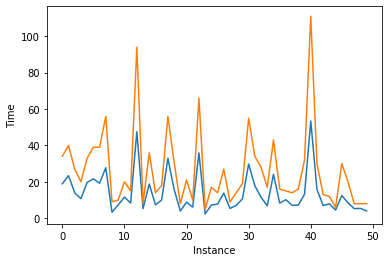

In [15]:
main()